In [1]:
# CELL1 – 10 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

#Read file into a dataframe

health = pd.read_csv('2017Health.txt', sep = '\t')


#Separate the dataframe into it's values

TBR = health['Teen Birth Rate'].values
VCR = health['Violent Crime Rate'].values
PS = health['Percentage Smokers'].values


#Used later for indexing

variables = ['Teen Birth Rate', 'Violent Crime Rate', 'Percentage Smokers']


#Calculating statistics for Teen Birth Rate

TBR_mean = round(np.mean(TBR), 2)
TBR_std = round(np.std(TBR), 2)
TBR_min = round(np.min(TBR), 2)
TBR_max = round(np.max(TBR), 2)


#Calculating Statistics for Violent Crime Rate

VCR_mean = round(np.mean(VCR), 2)
VCR_std = round(np.std(VCR), 2)
VCR_min = round(np.min(VCR), 2)
VCR_max = round(np.max(VCR), 2)


#Calculating Statistics for Percentage of Smokers

PS_mean = round(np.mean(PS), 2)
PS_std = round(np.std(PS), 2)
PS_min = round(np.min(PS), 2)
PS_max = round(np.max(PS), 2)


#Grouping values for the dataframe

means = [TBR_mean, VCR_mean, PS_mean]
stds = [TBR_std, VCR_std, PS_std]
mins = [format(TBR_min, '.2f'), format(VCR_min, '.2f'), format(PS_min, '.2f')]
maxs = [format(TBR_max, '.2f'), format(VCR_max, '.2f'), format(PS_max, '.2f')]

data = {'Mean':means, 'Standard Deviation':stds, 'Minimum':mins, 'Maximum':maxs}


#Creating and printing the dataframe

analysis = pd.DataFrame(data, index = variables)
print()
print(analysis)


#Calculating the 95% confidence intervals

PS_left = round(PS_mean-1.96*PS_std/sqrt(len(PS)), 2)
PS_right = round(PS_mean+1.96*PS_std/sqrt(len(PS)), 2)

print()
print(f"The 95% confidence interval for percentage smokers is: {PS_left} to {PS_right}")
print()
print('''The 95% confidence interval here shows that the true mean of the Percentage of Smokers has a 95% chance of being within 
those 2 values''')





Populating the interactive namespace from numpy and matplotlib

                      Mean  Standard Deviation Minimum Maximum
Teen Birth Rate      41.50               14.56   15.00   77.00
Violent Crime Rate  409.59              166.17  127.00  809.00
Percentage Smokers   16.92                2.37   11.00   21.00

The 95% confidence interval for percentage smokers is: 16.35 to 17.49

The 95% confidence interval here shows that the true mean of the Percentage of Smokers has a 95% chance of being within 
those 2 values


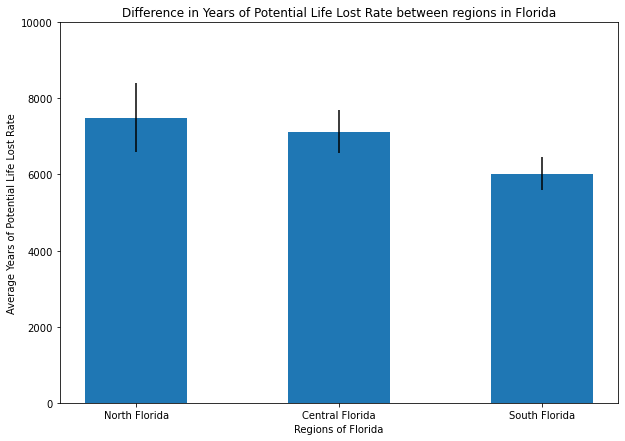

In [2]:
# CELL2 – 10 marks

#Get each county name in it's respective region

North_Florida = ['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion']
Central_Florida = ['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard']
South_Florida = ['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota']


#Separate the YPLLR between each region

YPLLR_North = health['Years of Potential Life Lost Rate'][health['County'].isin(North_Florida)].values
YPLLR_Central = health['Years of Potential Life Lost Rate'][health['County'].isin(Central_Florida)].values
YPLLR_South = health['Years of Potential Life Lost Rate'][health['County'].isin(South_Florida)].values


#Calculate the mean of the YPLLR for each region

North_mean = round(np.mean(YPLLR_North), 2)
Central_mean = round(np.mean(YPLLR_Central), 2)
South_mean = round(np.mean(YPLLR_South), 2)


#Calculate the 95% confidence intervals for each region

North_err = 1.96*np.std(YPLLR_North)/sqrt(len(YPLLR_North))


Central_err = 1.96*np.std(YPLLR_Central)/sqrt(len(YPLLR_Central))


South_err = 1.96*np.std(YPLLR_South)/sqrt(len(YPLLR_South))


#Plot the means of the YPLLR for each region, along with the 95% confidence intervals

x = np.arange(3)

figure(figsize(10, 7))

bar(x, [North_mean, Central_mean, South_mean], 0.5, yerr = [North_err, Central_err, South_err])

xticks(x, ['North Florida', 'Central Florida', 'South Florida'])

ylim(0, 10000)

xlabel('Regions of Florida')
ylabel('Average Years of Potential Life Lost Rate')
title('Difference in Years of Potential Life Lost Rate between regions in Florida')

show()



In [3]:
# CELL3 – 10 marks


#Get the YPLLR and the combined data TBR and PS

YPLLR = health['Years of Potential Life Lost Rate']
comb = health[['Teen Birth Rate', 'Percentage Smokers']]


#Add the intercept

comb = sm.add_constant(comb)


#Calculate line of best fit

results = sm.OLS(YPLLR, comb).fit()

slope_TBR = results.params[1]
slope_PS = results.params[2]
intercept = results.params[0]


#Print the linear regression equation

print(f"YPLLR = {round(slope_TBR, 2)}*TBR+{round(slope_PS, 2)}*PS+{round(intercept, 2)}")


#Get the equations from the data analytics team

predA_YPLLR = 60.6*health['Teen Birth Rate']+5297.06
predB_YPLLR = 1.36*health['Violent Crime Rate']+7254.3


#Calculate the MAE for both equations

aerror1 = abs(predA_YPLLR - YPLLR)
A_MAE = round(np.mean(aerror1), 2)

aerror2 = abs(predB_YPLLR - YPLLR)
B_MAE = round(np.mean(aerror2), 2)

print()


#Determine whether the error values for both equations are normal or not


norm_A = round(stats.shapiro(aerror1)[1], 2)
norm_B = round(stats.shapiro(aerror2)[1], 2)


#Since both values are not normal, the mann-whitney U test to determine statistical significance


mann_test = round(stats.mannwhitneyu(aerror1, aerror2, alternative='two-sided')[1], 2)



print(f'''After conducting some performance evaluation, I found that the equation with "Teen Birth Rate" as the predictor variable 
had a MAE of {A_MAE}, which was smaller and thus more accurate than the one with "Violent Crime Rate" as the predictor 
variable, which had {B_MAE}. To find out whether the difference was statistically significant, I had to do a t-test. 
To determine what t-test to do, I first did a Shapiro-Wilk test for normality, in which I got {format(norm_A, '.2f')} for the "Teen Birth 
Rate" errors, and {norm_B} for the "Violent Crime Rate" errors, showing me that both error sets are not normal. Since both 
error sets are not normal and are independent, I conducted the Mann-Whitney U test, in which I got {mann_test}, which is equal to 
0.05, and thus determines that the difference is not statistically significant.''')
print()
print('''In conclusion, there is no statistically significant difference between both models, as indicated by the Mann-Whitney U 
test, meaning that the observed difference happened by chance.''')



YPLLR = 36.09*TBR+225.19*PS+2503.14

After conducting some performance evaluation, I found that the equation with "Teen Birth Rate" as the predictor variable 
had a MAE of 948.46, which was smaller and thus more accurate than the one with "Violent Crime Rate" as the predictor 
variable, which had 1219.42. To find out whether the difference was statistically significant, I had to do a t-test. 
To determine what t-test to do, I first did a Shapiro-Wilk test for normality, in which I got 0.00 for the "Teen Birth 
Rate" errors, and 0.01 for the "Violent Crime Rate" errors, showing me that both error sets are not normal. Since both 
error sets are not normal and are independent, I conducted the Mann-Whitney U test, in which I got 0.05, which is equal to 
0.05, and thus determines that the difference is not statistically significant.

In conclusion, there is no statistically significant difference between both models, as indicated by the Mann-Whitney U 
test, meaning that the observed differ

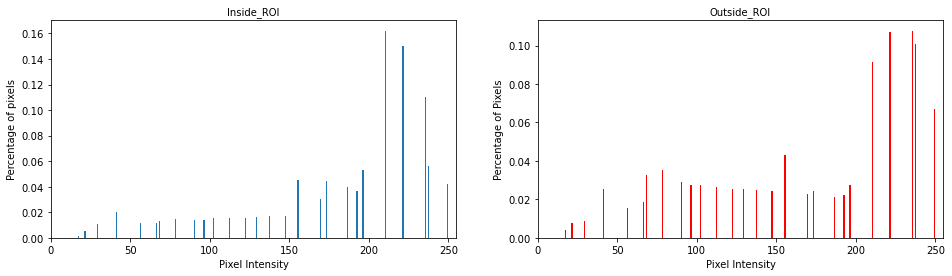


Similarity Score (Euclidean Distance):  0.11

The similarity score shows that the inside-ROI has a similar histogram to the outside-ROI in the image, meaning that both 
regions of the image are similar.


In [4]:
# CELL4 – 10 marks

#Read the image into a matrix twice

inside_ROI = imread('Model/m1.png')*255
outside_ROI = imread('Model/m1.png')*255


#Determine the points that are inside and outside the ROI circle

width, height = inside_ROI.shape[:2]

Y, X = np.ogrid[:height, :width]

dist = np.sqrt((X - 256)**2 + (Y-256)**2)

inside = dist <= 150

outside = dist > 150


#Turn all the points that are inside or outside the circle "off" for the image matrices

inside_ROI[outside] = 0
outside_ROI[inside] = 0


#Remove all the points that are 0 or "off"

inside_ROI = inside_ROI[~(inside_ROI == 0)]
outside_ROI = outside_ROI[~(outside_ROI == 0)]


#Plot the image histograms

ins = inside_ROI.ravel()
outs = outside_ROI.ravel()

bins = arange(0, 257, 1)

figure(figsize(16, 4))

subplot(1, 2, 1)

rh=hist(ins, bins, density=True)
xlim(0, 255)
title('Inside_ROI', fontsize=10)
xlabel('Pixel Intensity')
ylabel('Percentage of pixels')

subplot(1, 2, 2)

gh=hist(outs, bins, density=True, color='red')
xlim(0, 255)
title('Outside_ROI', fontsize=10)
xlabel('Pixel Intensity')
ylabel('Percentage of Pixels')


show()


#Find the euclidean distance between the inside_ROI and outside_ROI

inside_hist = rh[0]
outside_hist = gh[0]

diff = inside_hist-outside_hist
diff = diff*diff
sum_diff = sum(diff)
sqrt_diff = sqrt(sum_diff)


print()
print("Similarity Score (Euclidean Distance): ", round(sqrt_diff, 2))
print()
print('''The similarity score shows that the inside-ROI has a similar histogram to the outside-ROI in the image, meaning that both 
regions of the image are similar.''')






Correlation Coefficient r = 0.81

The correlation coefficient shows us that the average pixel intensity of the inside-ROI has a strong correlation to the 
true overall image score.


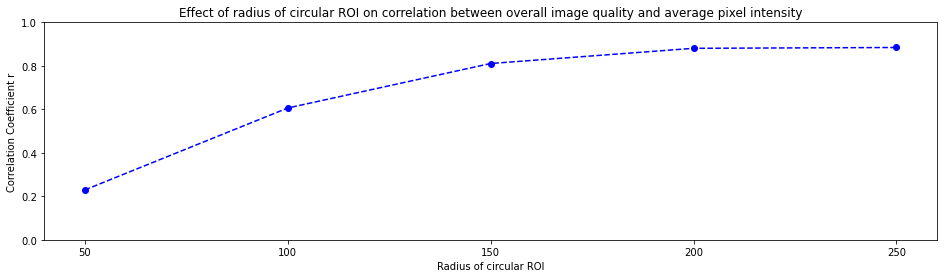

In [5]:
# CELL5 – 10 marks


#Read the image qualities into a dataframe

img_scores = pd.read_excel('Q_scores.xlsx')
qualities = img_scores['Quality']
correlations = [1, 2, 3, 4, 5]


#Get the correlation between the overall image quality and average pixel intesity of the circle
#for multiple circles with radii from 50 to 250. Store them in correlations

count=0

for j in range(50, 300, 50):
    
    img1 = imread('Model/m1.png')*255
    img2 = imread('Model/m2.png')*255
    img3 = imread('Model/m3.png')*255
    img4 = imread('Model/m4.png')*255
    img5 = imread('Model/m5.png')*255
    img6 = imread('Model/m6.png')*255
    img7 = imread('Model/m7.png')*255
    img8 = imread('Model/m8.png')*255
    img9 = imread('Model/m9.png')*255
    img10 = imread('Model/m10.png')*255
    
    
    width, height = img1.shape[:2]

    Y, X = np.ogrid[:height, :width]

    dist = np.sqrt((X - 256)**2 + (Y-256)**2)

    outside = dist > j

    img1[outside] = 0
    img2[outside] = 0
    img3[outside] = 0
    img4[outside] = 0
    img5[outside] = 0
    img6[outside] = 0
    img7[outside] = 0
    img8[outside] = 0
    img9[outside] = 0
    img10[outside] = 0
    

    img1 = img1[~(img1 == 0)]
    img2 = img2[~(img2 == 0)]
    img3 = img3[~(img3 == 0)]
    img4 = img4[~(img4 == 0)]
    img5 = img5[~(img5 == 0)]
    img6 = img6[~(img6 == 0)]
    img7 = img7[~(img7 == 0)]
    img8 = img8[~(img8 == 0)]
    img9 = img9[~(img9 == 0)]
    img10 = img10[~(img10 == 0)] 
    


    averages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    averages[0] = round(np.mean(img1), 2)
    averages[1] = round(np.mean(img2), 2)
    averages[2] = round(np.mean(img3), 2)
    averages[3] = round(np.mean(img4), 2)
    averages[4] = round(np.mean(img5), 2)
    averages[5] = round(np.mean(img6), 2)
    averages[6] = round(np.mean(img7), 2)
    averages[7] = round(np.mean(img8), 2)
    averages[8] = round(np.mean(img9), 2)
    averages[9] = round(np.mean(img10), 2)


    
    
    correlations[count] = stats.pearsonr(averages, qualities)[0]
    count+=1
    
    
    #Print the correlation coefficient and statement if the radius of the circle is 150
    
    if j==150:
        
        print(f'Correlation Coefficient r = {round(stats.pearsonr(averages, qualities)[0], 2)}')
        print()
        print('''The correlation coefficient shows us that the average pixel intensity of the inside-ROI has a strong correlation to the 
true overall image score.''')


#Graph the correlations

x = np.arange(50, 300, 50)


plot(x, correlations, 'b--o')
xticks([50, 100, 150, 200, 250])
xlabel('Radius of circular ROI')
ylabel('Correlation Coefficient r')

ylim([0, 1])

title('Effect of radius of circular ROI on correlation between overall image quality and average pixel intensity')
show()



IQ = 0.65*API-101.5

MSE: 2.03

  Image Name     API True IQ  Predicted IQ
0     m3.png  166.22    8.00          5.74
1     m4.png  165.39    7.00          5.21
2     m9.png  162.93    2.00          3.62
3     m1.png  175.25   10.00         11.57
4    m10.png  161.12    1.00          2.45



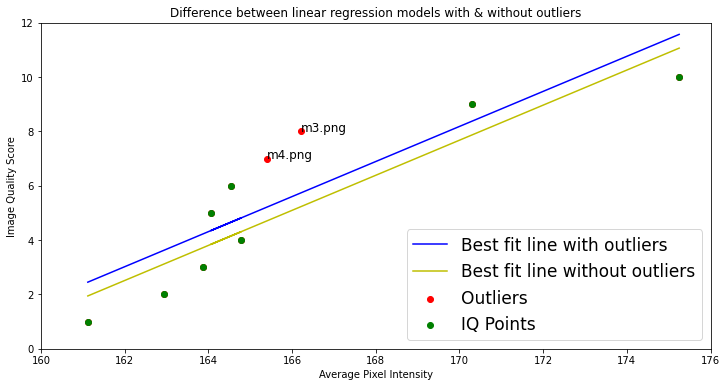

In [6]:
# CELL6 – 10 marks


#Read image quality scores into a dataframe and separate it into the qualities

img_scores = pd.read_excel('Q_scores.xlsx')
IQ = img_scores['Quality']


#Read the images into a matrix

img1 = imread('Model/m1.png')*255
img2 = imread('Model/m2.png')*255
img3 = imread('Model/m3.png')*255
img4 = imread('Model/m4.png')*255
img5 = imread('Model/m5.png')*255
img6 = imread('Model/m6.png')*255
img7 = imread('Model/m7.png')*255
img8 = imread('Model/m8.png')*255
img9 = imread('Model/m9.png')*255
img10 = imread('Model/m10.png')*255


#Get the average pixel intensity for all the images

API = np.linspace(1, 10, 10)


API[0] = round(np.mean(img1), 2)
API[1] = round(np.mean(img2), 2)
API[2] = round(np.mean(img3), 2)
API[3] = round(np.mean(img4), 2)
API[4] = round(np.mean(img5), 2)
API[5] = round(np.mean(img6), 2)
API[6] = round(np.mean(img7), 2)
API[7] = round(np.mean(img8), 2)
API[8] = round(np.mean(img9), 2)
API[9] = round(np.mean(img10), 2)



#Get the linear regression model to predict the IQ from API

temp_API = sm.add_constant(API)


results = sm.OLS(IQ, temp_API).fit()


slope = results.params[1]

intercept = results.params[0]


print(f"IQ = {round(slope, 2)}*API{round(intercept, 2)}")
print()

pred_IQ = slope*API+intercept


#Get the MSE of the regression model

MSE = (pred_IQ-IQ)**2
MSE = np.mean(MSE)
print(f'MSE: {round(MSE, 2)}')


#Create the outliers dataframe

outliers = pd.DataFrame(columns=['Image Name', 'API', 'True IQ', 'Predicted IQ'])


#Get the difference between the pred_IQ and actual IQ. Then find the 5 biggest differences
#and add them to the outliers dataframe. 

diffs = abs(pred_IQ-IQ)


maxes = np.arange(5)

for i in range(5):
    j = diffs[diffs==np.max(diffs)].index[0]
    maxes[i] = j
    diffs[j] = 0
    
    outliers.loc[i] = ['m'+str(j+1)+'.png'] + [format(API[j], '.2f')] + [format(IQ[j], '.2f')] + [round(pred_IQ[j], 2)]
    
print()
print(outliers)
print()


#Create copies of IQ and API, and delete the 2 largest outliers from them

IQ2 = IQ.copy(deep=True)


IQ2.pop(maxes[0])
IQ2.pop(maxes[1])


API2 = API

API2 = np.delete(API2, maxes[0])
API2 = np.delete(API2, maxes[1]-1)


#Get the linear regression model between IQ and API without the 2 outliers

temp_API2 = sm.add_constant(API2)

results2 = sm.OLS(IQ2, temp_API2).fit()

slope2 = results2.params[1]
intercept2 = results2.params[0]

pred_IQ2 = slope2*API2+intercept2


#Get the MSE for the regression model without the 2 outliers

MSE2 = (pred_IQ2-IQ2)**2

MSE2 = np.mean(MSE2)


#Plot both linear regression models along with the points
#Highlight the outliers in red and have their image name next to the point

figure(figsize(12, 6))

scatter(API, IQ, color='red', label='Outliers')
annotate('m'+str(maxes[0]+1)+'.png', (API[maxes[0]], IQ[maxes[0]]), fontsize=12)   #Write the image name next to the outliers
annotate('m'+str(maxes[1]+1)+'.png', (API[maxes[1]], IQ[maxes[1]]), fontsize=12)
plot(API, pred_IQ, 'b-', label='Best fit line with outliers')

scatter(API2, IQ2, color='green', label='IQ Points')
plot(API2, pred_IQ2, 'y-', label='Best fit line without outliers')

legend(loc='best', fontsize=17)

title('Difference between linear regression models with & without outliers')
xlabel('Average Pixel Intensity')
ylabel('Image Quality Score')

xlim([160, 176])
ylim([0, 12])

show()



In [7]:
import scipy
print(scipy.__version__)

1.6.2
